In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('hotel_bookings.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
#show the total number of nulls for each feature
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
def impute_median(series):
    return series.fillna(series.median())

In [7]:
#Fill children column with the median of the children
df.children = df['children'].transform(impute_median)

In [8]:
# Remove rows with NaN in the 'country' column from the original DataFrame
df.dropna(subset=['country'], inplace=True)

# Reset the index after removing rows
df.reset_index(drop=True, inplace=True)

In [9]:
df.isnull().sum()

# replace agent and company with have and dont have

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16006
company         

In [10]:
df['agent_encoded'] = df['agent'].isnull().astype(int)

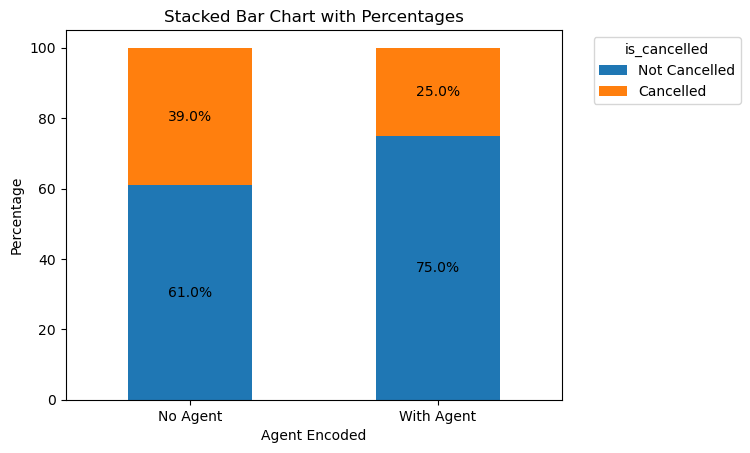

In [11]:
grouped = df.groupby(['agent_encoded', 'is_canceled']).size().unstack(fill_value=0)

# Calculate percentages within each 'company_encoded' group
grouped_percentages = grouped.divide(grouped.sum(axis=1), axis=0) * 100

grouped_percentages.index = ['No Agent', 'With Agent']

# Create a stacked bar chart with percentages
ax = grouped_percentages.plot(kind='bar', stacked=True)
plt.xlabel('Agent Encoded')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart with Percentages')
plt.xticks(rotation=0)
plt.legend(title='is_cancelled', labels=['Not Cancelled', 'Cancelled'], bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate the bars with percentages
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.show()

In [12]:
df['company_encoded'] = df['company'].isnull().astype(int)

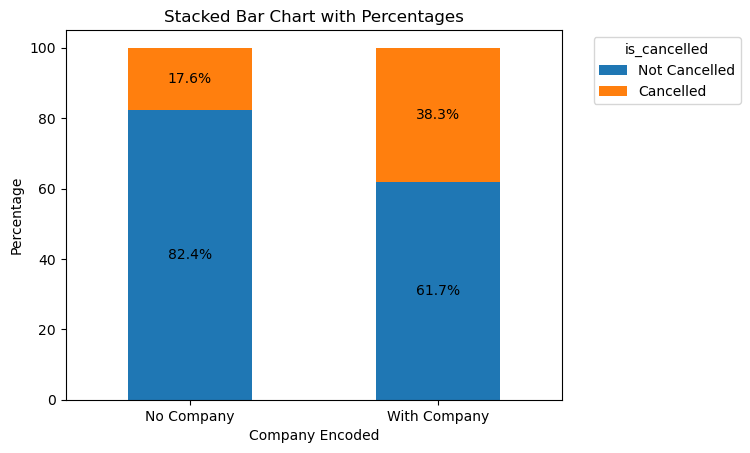

In [13]:
grouped = df.groupby(['company_encoded', 'is_canceled']).size().unstack(fill_value=0)

# Calculate percentages within each 'company_encoded' group
grouped_percentages = grouped.divide(grouped.sum(axis=1), axis=0) * 100

grouped_percentages.index = ['No Company', 'With Company']

# Create a stacked bar chart with percentages
ax = grouped_percentages.plot(kind='bar', stacked=True)
plt.xlabel('Company Encoded')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart with Percentages')
plt.xticks(rotation=0)
plt.legend(title='is_cancelled', labels=['Not Cancelled', 'Cancelled'], bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate the bars with percentages
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.show()

In [14]:
df.skew()

C:\Users\adria\AppData\Local\Temp\ipykernel_3792\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


is_canceled                        0.532434
lead_time                          1.344451
arrival_date_year                 -0.234314
arrival_date_week_number          -0.009956
arrival_date_day_of_month         -0.002477
stays_in_weekend_nights            1.298351
stays_in_week_nights               2.697650
adults                            18.458501
children                           4.105649
babies                            24.701893
is_repeated_guest                  5.317373
previous_cancellations            24.425685
previous_bookings_not_canceled    24.037152
booking_changes                    6.005437
agent                              1.092215
company                            0.599575
days_in_waiting_list              11.919584
adr                               10.598351
required_car_parking_spaces        4.195646
total_of_special_requests          1.346640
agent_encoded                      2.141089
company_encoded                   -3.874565
dtype: float64

In [15]:
df["babies"].unique()

array([ 0,  1,  2, 10,  9], dtype=int64)

In [16]:
# Count the frequency of each unique value in the "babies" column
babies_counts = df["babies"].value_counts()
babies_counts

0     117988
1        898
2         14
10         1
9          1
Name: babies, dtype: int64

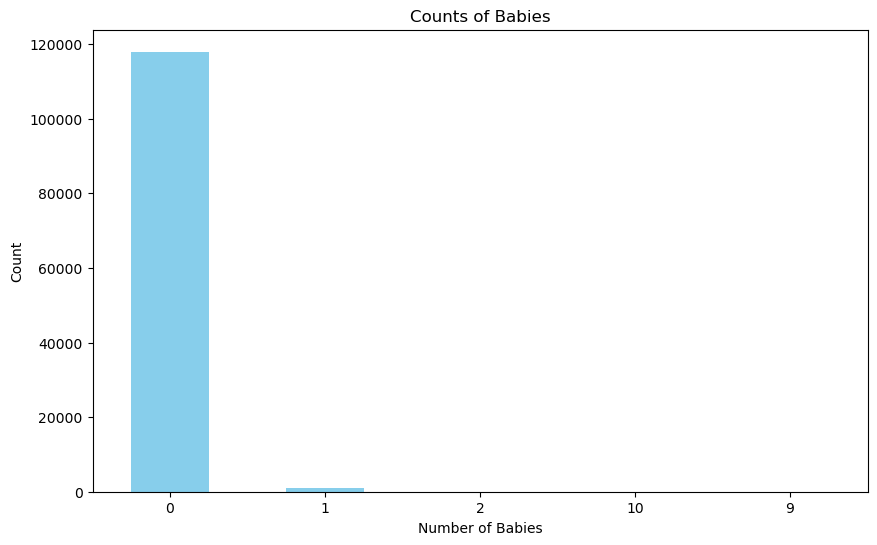

In [17]:
plt.figure(figsize=(10, 6))
babies_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Number of Babies')
plt.ylabel('Count')
plt.title('Counts of Babies')
plt.xticks(rotation=0)
plt.show()

In [18]:
df["adults"].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10],
      dtype=int64)

In [19]:
# Count the frequency of each unique value in the "adults" column
adult_counts = df["adults"].value_counts()
adult_counts

2     89498
1     22735
3      6198
0       393
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

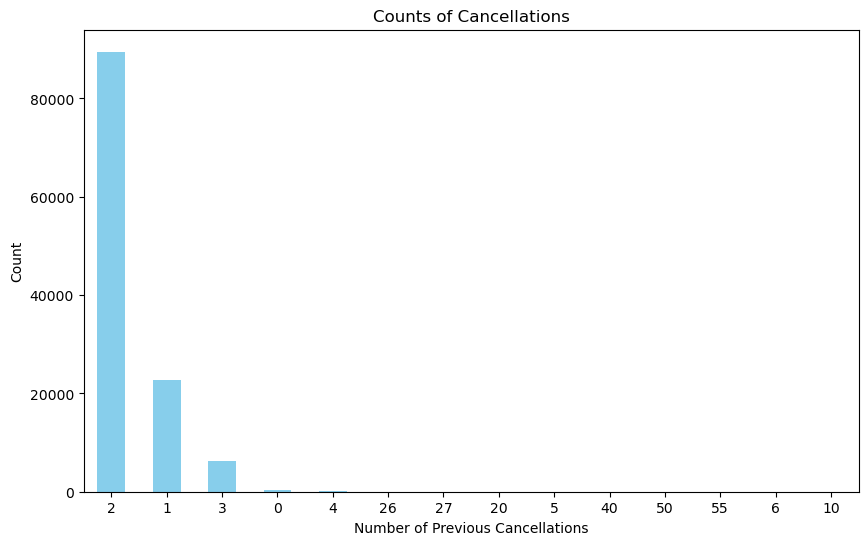

In [20]:
plt.figure(figsize=(10, 6))
adult_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Number of Previous Cancellations')
plt.ylabel('Count')
plt.title('Counts of Cancellations')
plt.xticks(rotation=0)
plt.show()

C:\Users\adria\AppData\Local\Temp\ipykernel_3792\2614295107.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


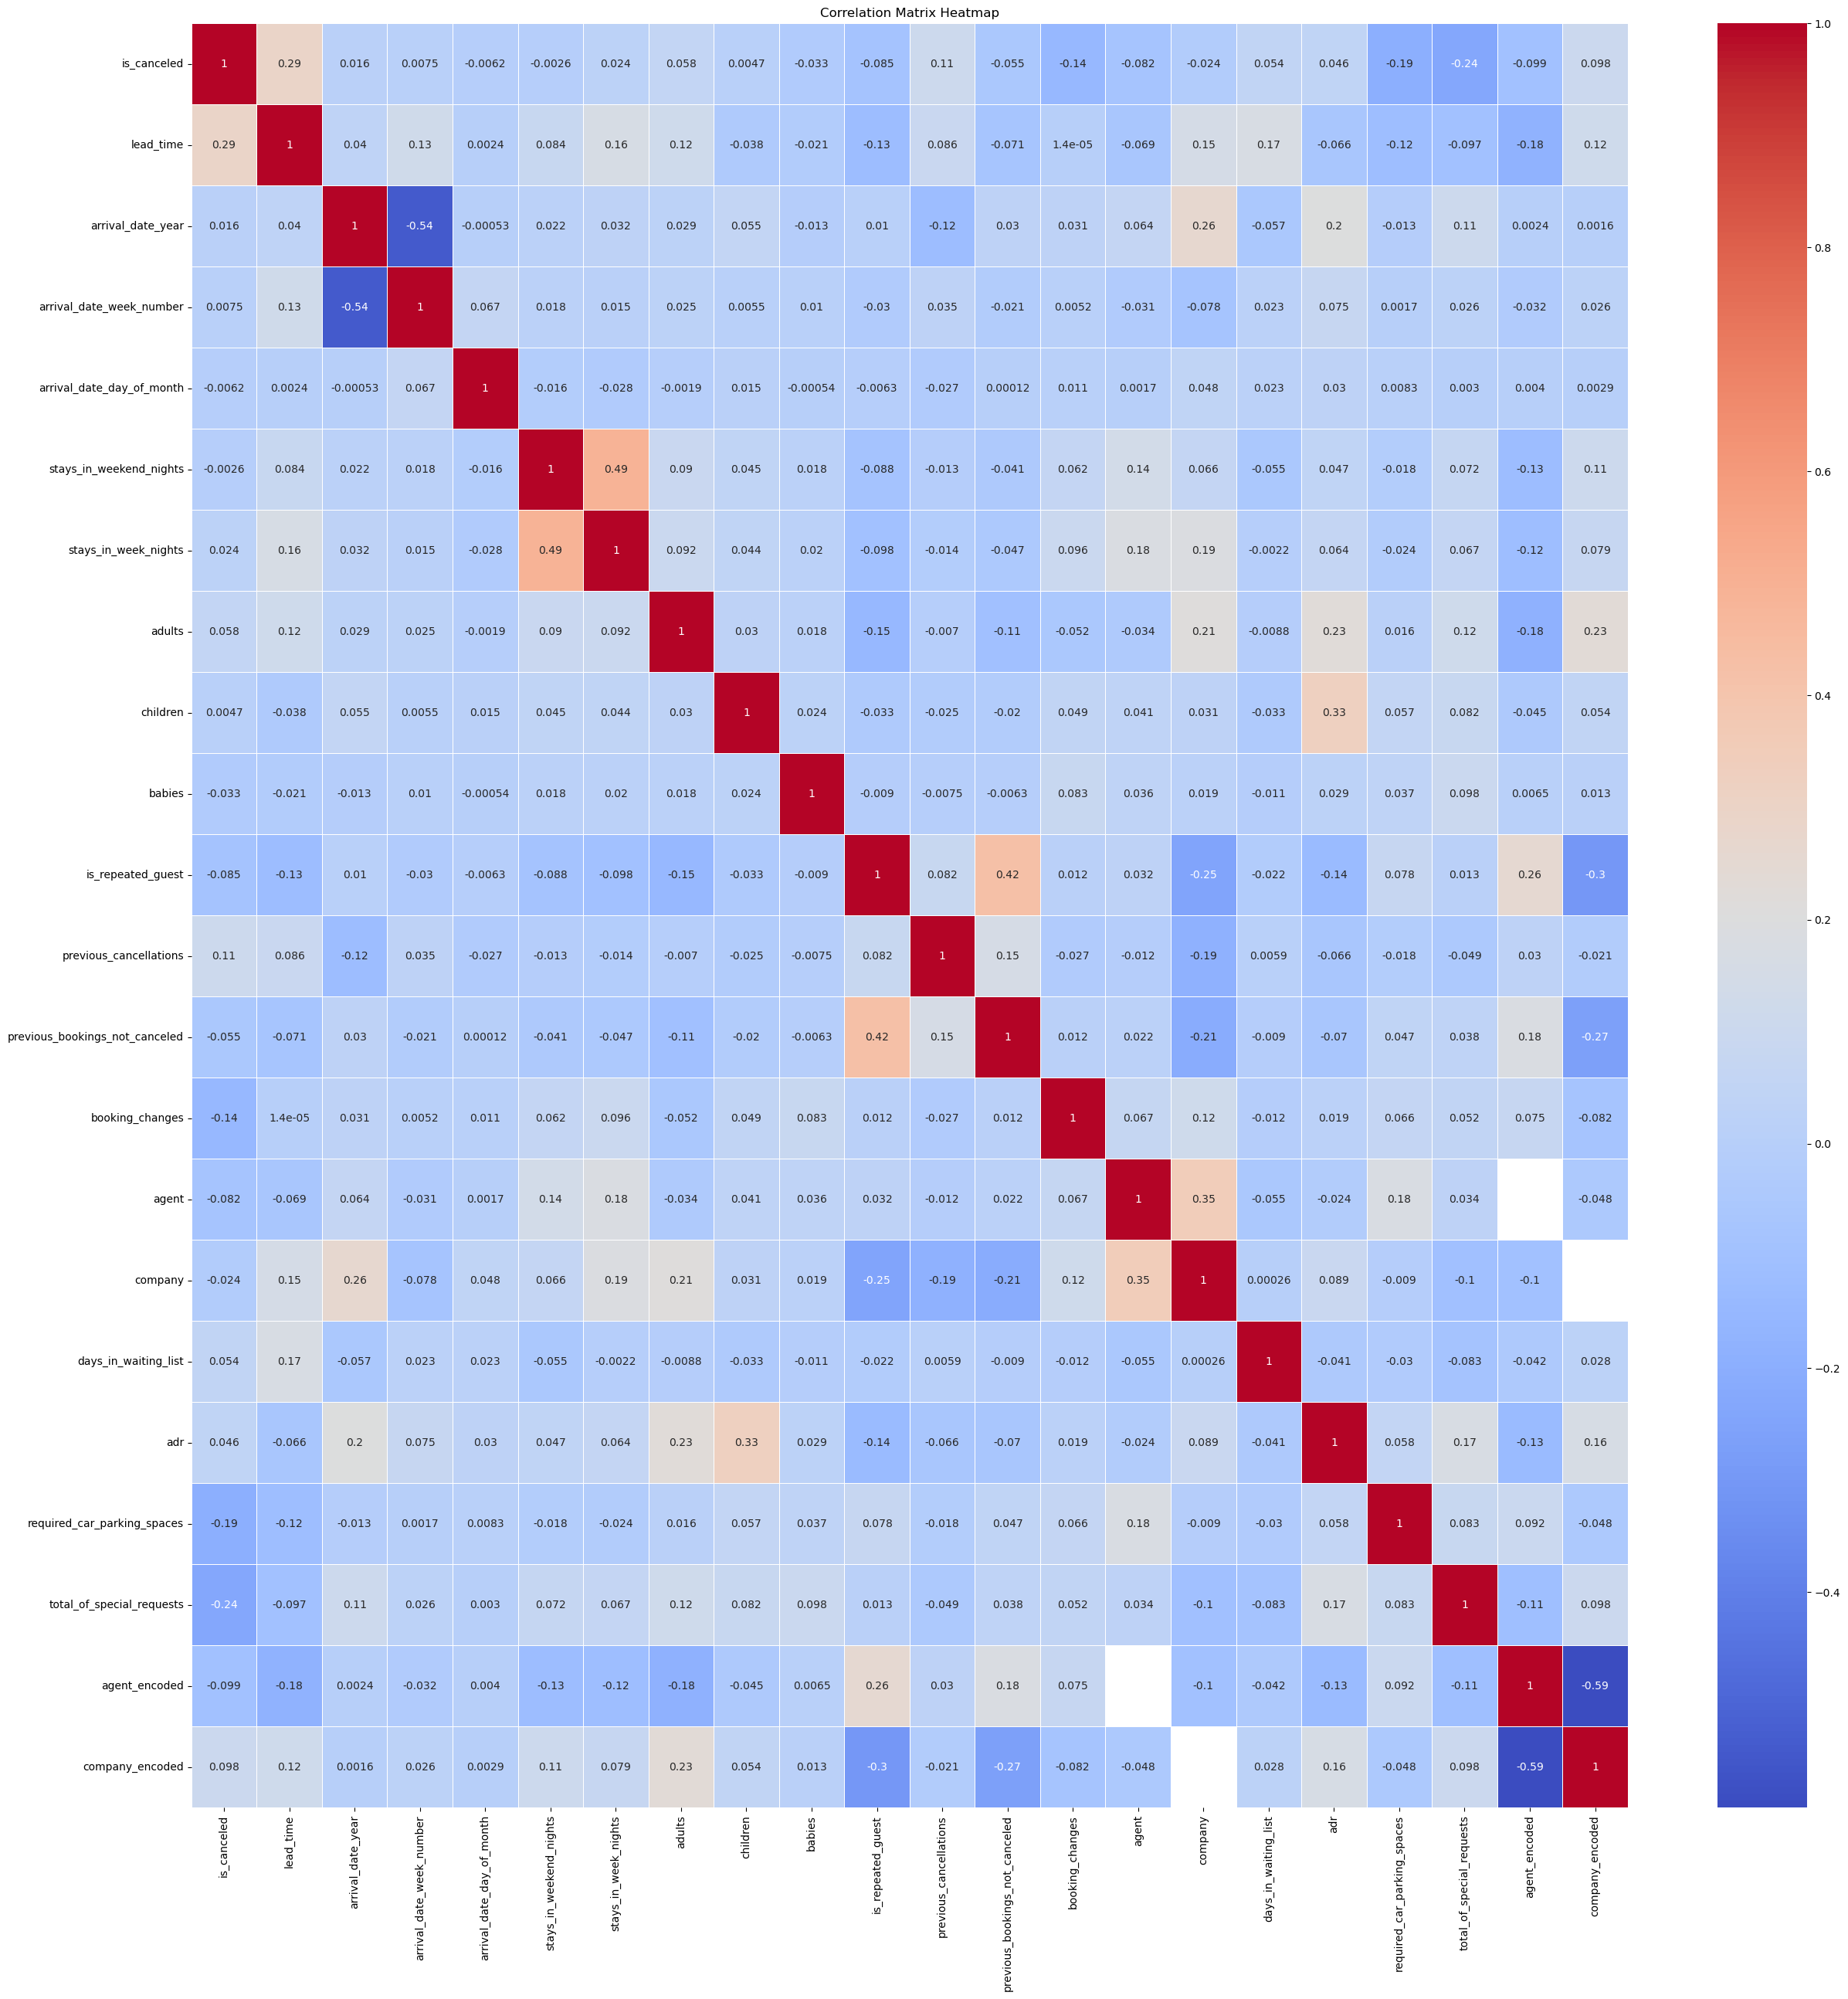

In [21]:
correlation_matrix = df.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [22]:
#correlation between is_canceled against other numeric attributes
is_cancelled_correlation = correlation_matrix['is_canceled']
sorted_correlations = is_cancelled_correlation.sort_values(ascending=False, key=abs)
sorted_correlations

is_canceled                       1.000000
lead_time                         0.291940
total_of_special_requests        -0.235595
required_car_parking_spaces      -0.194801
booking_changes                  -0.144669
previous_cancellations            0.109914
agent_encoded                    -0.099457
company_encoded                   0.098028
is_repeated_guest                -0.085185
agent                            -0.081954
adults                            0.058408
previous_bookings_not_canceled   -0.055495
days_in_waiting_list              0.054008
adr                               0.046133
babies                           -0.032523
company                          -0.024385
stays_in_week_nights              0.024103
arrival_date_year                 0.016339
arrival_date_week_number          0.007481
arrival_date_day_of_month        -0.006173
children                          0.004740
stays_in_weekend_nights          -0.002639
Name: is_canceled, dtype: float64

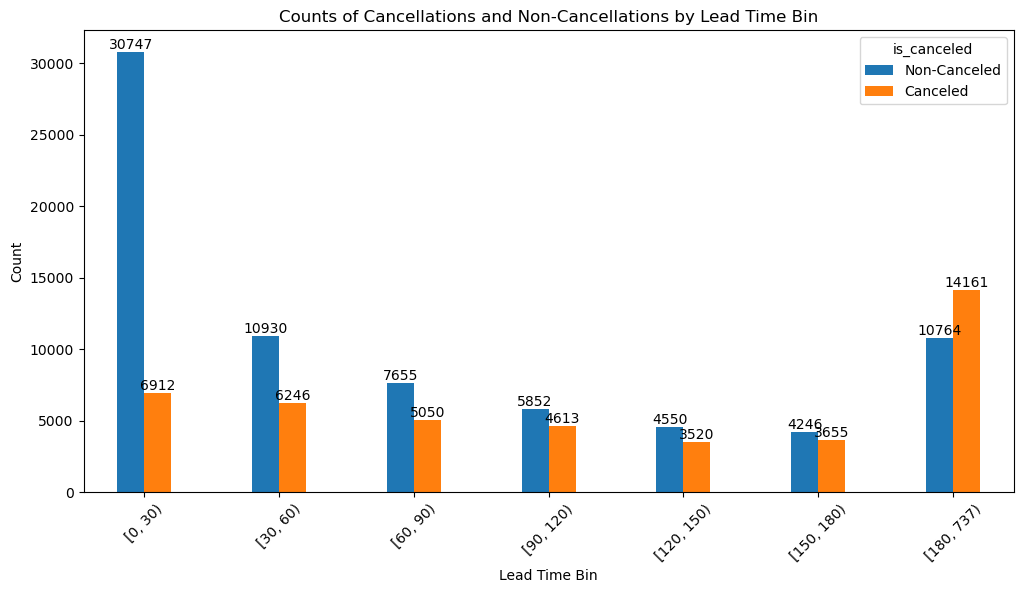

In [23]:
# Define lead time bins
lead_time_bins = [0, 30, 60, 90, 120, 150, 180, 737]

# Create a new column to categorize lead times into bins
df['lead_time_bin'] = pd.cut(df['lead_time'], bins=lead_time_bins, right=False)

# Group the data by lead time bins and is_canceled, and count the occurrences
cancellation_counts = df.groupby(['lead_time_bin', 'is_canceled']).size().unstack(fill_value=0)

# Create a bar chart to visualize the counts of cancellations and non-cancellations in each lead time bin
ax = cancellation_counts.plot(kind='bar', figsize=(12, 6), width=0.4)

# Customize the plot
plt.xlabel('Lead Time Bin')
plt.ylabel('Count')
plt.title('Counts of Cancellations and Non-Cancellations by Lead Time Bin')
plt.xticks(rotation=45)
plt.legend(title='is_canceled', labels=['Non-Canceled', 'Canceled'], loc='upper right')

# Annotate the bars with counts
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width / 2, y + height), ha='center', va='bottom')

plt.show()

In [24]:
# from this graph you can see that as lead time increases, the proportion of cancelled booking increases

In [25]:
from scipy.stats import chi2_contingency

# List of features (other than 'deposit_type') to test
feature_list = ['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'arrival_date_week_number', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'customer_type', 'deposit_type', 'reservation_status','company_encoded','agent_encoded']

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Feature', 'Chi-Squared Statistic', 'P-value'])

# Loop through the list of features and perform chi-squared tests
for feature in feature_list:
    contingency_table = pd.crosstab(df['is_canceled'], df[feature])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    results_df = results_df.append({'Feature': feature, 'Chi-Squared Statistic': chi2, 'P-value': p}, ignore_index=True)

# Display the results as a table
print(results_df)

C:\Users\adria\AppData\Local\Temp\ipykernel_3792\1150371686.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature, 'Chi-Squared Statistic': chi2, 'P-value': p}, ignore_index=True)
C:\Users\adria\AppData\Local\Temp\ipykernel_3792\1150371686.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature, 'Chi-Squared Statistic': chi2, 'P-value': p}, ignore_index=True)
C:\Users\adria\AppData\Local\Temp\ipykernel_3792\1150371686.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature, 'Chi-Squared Statistic': chi2, 'P-value': p}, ignore_index=True)
C:\Users\adria\AppData\Local\Temp\ipykernel

                      Feature  Chi-Squared Statistic        P-value
0           arrival_date_year              76.864320   2.037629e-17
1          arrival_date_month             562.212171  1.679657e-113
2   arrival_date_day_of_month             321.887339   1.245444e-50
3    arrival_date_week_number            1096.605323  1.514505e-195
4                        meal             304.270625   1.298819e-64
5                     country           15434.681533   0.000000e+00
6              market_segment            8394.485010   0.000000e+00
7        distribution_channel            3653.712427   0.000000e+00
8          reserved_room_type             637.147604  2.215793e-131
9          assigned_room_type            4841.145584   0.000000e+00
10              customer_type            2254.871846   0.000000e+00
11               deposit_type           27548.334078   0.000000e+00
12         reservation_status          118902.000000   0.000000e+00
13            company_encoded            1141.70

In [46]:
df['arrival_date'] = df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype(str)

In [38]:
df['arrival_date_w_year'] = df['arrival_date'].astype(str) + '-' + df['arrival_date_year'].astype(str)

In [42]:
df['arrival_date_w_year'] = pd.to_datetime(df['arrival_date_w_year'], format='%B-%d-%Y')

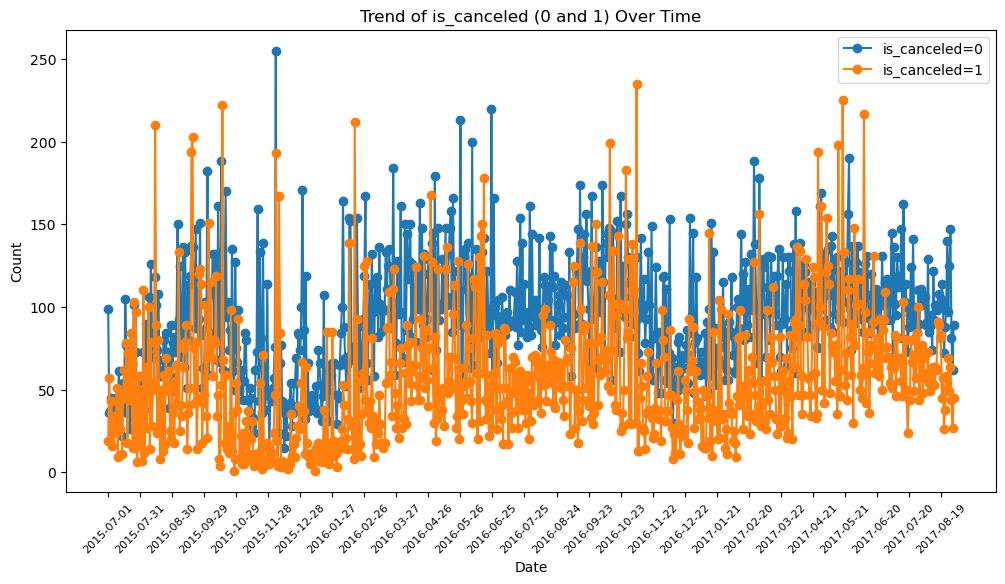

In [56]:
date_cancel_counts = df.groupby(['arrival_date_w_year', 'is_canceled']).size().unstack(fill_value=0)

# Create a new column that calculates the total counts for each date
date_cancel_counts['total'] = date_cancel_counts.sum(axis=1)

# Plot the trendlines
plt.figure(figsize=(12, 6))
plt.plot(date_cancel_counts.index, date_cancel_counts[0], label='is_canceled=0', marker='o', linestyle='-')
plt.plot(date_cancel_counts.index, date_cancel_counts[1], label='is_canceled=1', marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Trend of is_canceled (0 and 1) Over Time')

# Show only year/month as x-axis labels for readability
plt.xticks(date_cancel_counts.index[::30], rotation=45, fontsize=8)

# Add legend
plt.legend()

# Show the plot
plt.show()

In [57]:
#From this graph, we can observe a trend and see that generally, the number of cancelled booking is lower than the number of non-cancelled booking. 
#However, we can also observe that for certain period of time, there is a sharp increase in cancelled booking, which makes the number of cancelled booking higher than the number of non-cancelled booking.

In [59]:
dates_with_condition = []

# Iterate through the rows of date_cancel_counts
for index, row in date_cancel_counts.iterrows():
    # Check if the count for is_canceled=1 is higher than the count for is_canceled=0
    if row[1] > row[0]:
        dates_with_condition.append(index)

formatted_dates = [date.strftime('%Y-%m-%d') for date in dates_with_condition]

# Print the formatted dates
print("Dates where is_canceled=1 count is higher than is_canceled=0 count:")
print(formatted_dates)

Dates where is_canceled=1 count is higher than is_canceled=0 count:
['2015-07-02', '2015-07-09', '2015-07-13', '2015-07-16', '2015-07-18', '2015-07-20', '2015-07-21', '2015-07-22', '2015-07-25', '2015-07-27', '2015-07-30', '2015-08-03', '2015-08-13', '2015-08-14', '2015-08-27', '2015-08-30', '2015-09-05', '2015-09-10', '2015-09-17', '2015-09-18', '2015-09-24', '2015-09-26', '2015-10-03', '2015-10-05', '2015-10-16', '2015-10-17', '2015-10-24', '2015-11-13', '2015-12-08', '2015-12-09', '2016-01-22', '2016-01-27', '2016-02-17', '2016-02-21', '2016-02-26', '2016-02-28', '2016-03-25', '2016-04-14', '2016-04-19', '2016-04-24', '2016-04-28', '2016-05-13', '2016-05-24', '2016-06-07', '2016-06-08', '2016-06-09', '2016-06-12', '2016-06-14', '2016-06-15', '2016-06-17', '2016-07-07', '2016-09-07', '2016-09-08', '2016-09-09', '2016-09-24', '2016-09-30', '2016-10-01', '2016-10-13', '2016-10-15', '2016-10-21', '2016-10-22', '2016-10-27', '2016-10-28', '2016-11-01', '2016-11-03', '2016-11-04', '2016-1

In [39]:
df['arrival_date_w_year']

0            July-1-2015
1            July-1-2015
2            July-1-2015
3            July-1-2015
4            July-1-2015
               ...      
118897    August-30-2017
118898    August-31-2017
118899    August-31-2017
118900    August-31-2017
118901    August-29-2017
Name: arrival_date_w_year, Length: 118902, dtype: object

In [30]:
## we consider those at p-value == 0 
## top 7 are reservation status, country, deposit type, market segment, assigned_room_type, distribution_channel, customer type

C:\Users\adria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\adria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\adria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\adria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

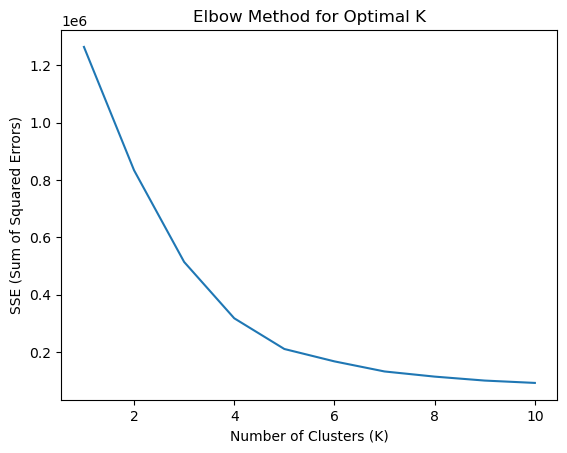

C:\Users\adria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


SSE (K-Means): 317832.03451806284
Explained Variance Ratio (PCA):
Principal Component 1: 0.0221
Principal Component 2: 0.0150
Principal Component 3: 0.0128


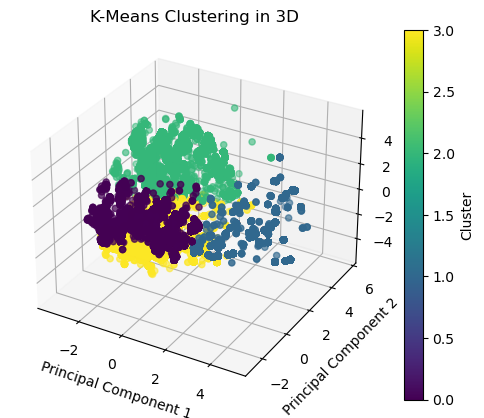

Correlation between Original Variables and PCA Components:
                                Principal Component 1  Principal Component 2  \
is_canceled                                  0.385913              -0.061704   
reservation_status_Canceled                  0.385353              -0.064350   
reservation_status_Check-Out                -0.385913               0.061704   
reservation_status_No-Show                   0.013517               0.010971   
country_ABW                                 -0.001929              -0.002803   
...                                               ...                    ...   
distribution_channel_Corporate              -0.029626               0.260037   
distribution_channel_Direct                 -0.132783               0.370423   
distribution_channel_GDS                    -0.012293              -0.000346   
distribution_channel_TA/TO                   0.132388              -0.471183   
distribution_channel_Undefined               0.001057        

In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Selected features
selected_features = ['reservation_status', 'country', 'deposit_type', 'market_segment', 'customer_type', 'assigned_room_type', 'distribution_channel', 'is_canceled']

# Select the features from the DataFrame
df_selected = df[selected_features]

# Perform one-hot encoding for categorical columns
df_selected = pd.get_dummies(df_selected, columns=['reservation_status', 'country', 'deposit_type', 'market_segment', 'customer_type', 'assigned_room_type', 'distribution_channel'])
    
# Optionally, scale the selected features
scaler = StandardScaler()
X = scaler.fit_transform(df_selected)

# Apply PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Loop to calculate SSE for different values of K
sse = {}
for i in range(1, 11):
    model = KMeans(n_clusters=i, random_state=0)
    model.fit_predict(X_pca)
    sse[i] = model.inertia_

# Plot SSE for different values of K
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Method for Optimal K')
plt.show()

# Choose the number of clusters (K)
K = 4

# Apply K-Means clustering
kmeans = KMeans(n_clusters=K, random_state=0)
df_selected['cluster'] = kmeans.fit_predict(X_pca)

# Calculate the Sum of Squared Errors (SSE) for K-Means
sse = kmeans.inertia_

# Print the SSE and explained variance ratio
print(f"SSE (K-Means): {sse}")
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio (PCA):")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i + 1}: {ratio:.4f}")

# Visualize the clusters in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=df_selected['cluster'], cmap='viridis')

# Add labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('K-Means Clustering in 3D')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')

plt.show()

# Calculate correlations between PCA components and original variables
correlations = pd.DataFrame(pca.components_, columns=df_selected.columns[:-1], index=['Principal Component 1', 'Principal Component 2', 'Principal Component 3']).T

# Display the correlation table
print("Correlation between Original Variables and PCA Components:")
print(correlations)

In [32]:
threshold = 0.3

# Filter correlations for each principal component independently
filtered_correlations_1 = correlations['Principal Component 1'][(correlations['Principal Component 1'] > threshold) | (correlations['Principal Component 1'] < -threshold)]
filtered_correlations_2 = correlations['Principal Component 2'][(correlations['Principal Component 2'] > threshold) | (correlations['Principal Component 2'] < -threshold)]
filtered_correlations_3 = correlations['Principal Component 3'][(correlations['Principal Component 3'] > threshold) | (correlations['Principal Component 3'] < -threshold)]

# Print the filtered correlations for each component
print("Filtered Correlations for Principal Component 1:")
print(filtered_correlations_1)

print("\nFiltered Correlations for Principal Component 2:")
print(filtered_correlations_2)

print("\nFiltered Correlations for Principal Component 3:")
print(filtered_correlations_3)

Filtered Correlations for Principal Component 1:
is_canceled                     0.385913
reservation_status_Canceled     0.385353
reservation_status_Check-Out   -0.385913
deposit_type_No Deposit        -0.368352
deposit_type_Non Refund         0.369554
Name: Principal Component 1, dtype: float64

Filtered Correlations for Principal Component 2:
market_segment_Direct          0.336496
market_segment_Online TA      -0.433732
distribution_channel_Direct    0.370423
distribution_channel_TA/TO    -0.471183
Name: Principal Component 2, dtype: float64

Filtered Correlations for Principal Component 3:
customer_type_Transient          0.483835
customer_type_Transient-Party   -0.450737
Name: Principal Component 3, dtype: float64


In [33]:
# Principal Component 1 (PCA1):

# Principal Component 1 (PCA1) is primarily characterized by the following correlations:

# is_canceled (0.386252): As PCA1 increases, there is a positive correlation with the likelihood of reservation cancellations. In other words, when PCA1 values are higher, reservations are more likely to be canceled.

# reservation_status_Canceled (0.385706): This correlation is similar to is_canceled, indicating that as PCA1 values increase, reservations are more frequently marked as "Canceled."

# reservation_status_Check-Out (-0.386252): Conversely, when PCA1 values are higher, there is a negative correlation with reservations being marked as "Check-Out." It suggests that PCA1 is associated with reservations that are not marked as "Check-Out."

# deposit_type_No Deposit (-0.368245): PCA1 also has a negative correlation with reservations having "No Deposit" as the deposit type. When PCA1 values increase, it's less likely for reservations to have "No Deposit."

# deposit_type_Non Refund (0.369444): In contrast, PCA1 has a positive correlation with reservations having a "Non Refund" deposit type. Higher PCA1 values are associated with reservations that have this deposit type.

# Principal Component 2 (PCA2):

# Principal Component 2 (PCA2) is characterized by the following correlations:

# market_segment_Direct (0.336768): As PCA2 values increase, there is a positive correlation with reservations made through the "Direct" market segment. In other words, PCA2 is associated with reservations made directly.

# market_segment_Online TA (-0.432739): Conversely, there is a negative correlation between PCA2 and reservations from the "Online TA" market segment. Higher PCA2 values are associated with fewer reservations from this segment.

# distribution_channel_Direct (0.370288): Similar to market_segment_Direct, PCA2 has a positive correlation with reservations made directly through distribution channels.

# distribution_channel_TA/TO (-0.472374): PCA2 has a negative correlation with reservations made through the "TA/TO" distribution channel. Higher PCA2 values correspond to fewer reservations from this channel.

# Principal Component 3 (PCA3):

# Principal Component 3 (PCA3) exhibits the following correlations:

# customer_type_Transient (0.486681): PCA3 has a positive correlation with reservations made by "Transient" customers. Higher PCA3 values suggest a higher prevalence of reservations from this customer type.

# customer_type_Transient-Party (-0.453829): In contrast, PCA3 has a negative correlation with reservations from "Transient-Party" customers. When PCA3 values increase, there are fewer reservations associated with this customer type.

# In summary, each principal component captures specific patterns and relationships within the dataset. PCA1 is associated with reservation cancellations, deposit types, and reservation statuses. PCA2 relates to market segments and distribution channels. PCA3 highlights differences in customer types. These principal components help us understand how different variables contribute to the overall variability in the data, without implying causation.

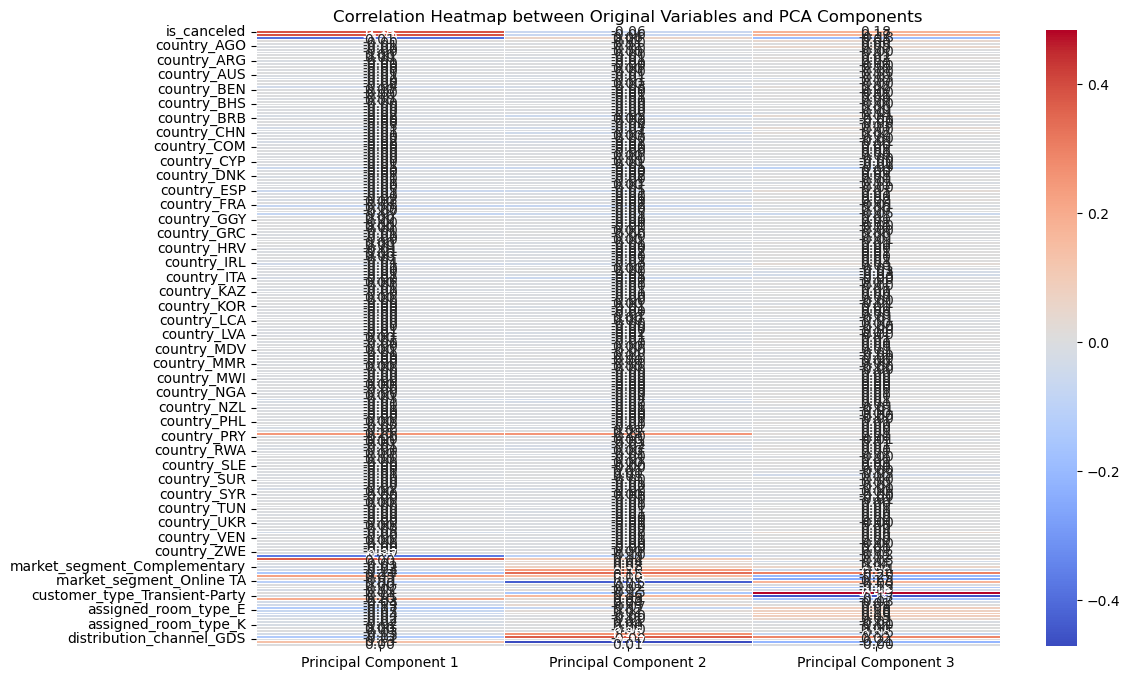

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlations between PCA components and original variables
correlations = pd.DataFrame(pca.components_, columns=df_selected.columns[:-1], index=['Principal Component 1', 'Principal Component 2', 'Principal Component 3']).T

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap between Original Variables and PCA Components')
plt.show()

In [35]:
# Calculate mean values for each feature within each cluster
cluster_means = df_selected.groupby('cluster').mean()
print(cluster_means)

         is_canceled  reservation_status_Canceled  \
cluster                                             
0           0.359997                     0.348002   
1           0.999511                     0.995109   
2           0.147153                     0.129191   
3           0.016037                     0.011273   

         reservation_status_Check-Out  reservation_status_No-Show  \
cluster                                                             
0                            0.640003                    0.011995   
1                            0.000489                    0.004402   
2                            0.852847                    0.017963   
3                            0.983963                    0.004764   

         country_ABW  country_AGO  country_AIA  country_ALB  country_AND  \
cluster                                                                    
0           0.000035     0.003509     0.000017     0.000069     0.000104   
1           0.000000     0.000000     